In [1]:
from urllib import request
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from pymongo import mongo_client

In [10]:
path = "c:/python/chromedriver.exe"
driver = webdriver.Chrome(path)
driver.implicitly_wait(3)
url = "https://www.mangoplate.com/top_lists"
driver.get(url)

C:\Users\Kosmo\AppData\Local\Temp\ipykernel_6132\3039946280.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


In [ ]:
click_cnt = 0
i = 0
k = 0
j = 1
link_list = {}

# 더보기 클릭 
for click_cnt in range(16):
    if click_cnt < 16 :
        driver.find_element(By.CLASS_NAME,'btn-more').click()
        click_cnt += 1
    elif click_cnt>=16:
        break

In [9]:
# 더보기 클릭(끝까지)
while driver.find_element(By.CLASS_NAME,"btn-more").is_displayed:
    if driver.find_element(By.CLASS_NAME,"btn-more").is_displayed:
        try:
            more_click = driver.find_element(By.CLASS_NAME,"btn-more").click()
        except:
            break        

In [5]:
href_li = 0
hli_add= [] # 주소를 리스트에 담기 
while True:
    if href_li >= 300:
        break
    elif href_li < 300:
        href_li +=1
        hrefs = driver.find_elements(By.XPATH,'/html/body/main/article/section/div/ul/li['+str(href_li)+']/a')
        for x in hrefs:
            href = x.get_attribute('href')
            hli_add.append(href)

In [6]:
Titles_li = 0
Tli_add = [] # 타이틀 리스트
while True:
    if Titles_li >= 300:
        break
    elif Titles_li < 300:
        Titles_li +=1
        Titles = driver.find_elements(By.XPATH,'/html/body/main/article/section/div/ul/li['+str(Titles_li)+']/a/figure/figcaption/div/span')
        for x in Titles:
            # print(x.text)
            Tli_add.append(x.text)

In [8]:
while True:
    if j <= 300:
        link_list[Tli_add[i]] = (hli_add[k])
        i+=1; k+=1; j+=1
    else:
        break

In [18]:
x = 0
for x in range(300):
    print(link_list['인천공항 맛집 베스트 7곳'])
    break

https://www.mangoplate.com/top_lists/1815_incheon_airport


In [38]:
# mongo DB 생성 및 col생성
from pymongo import mongo_client
url = 'mongodb://localhost:27017'
mg_client = mongo_client.MongoClient(url)
mg_db = mg_client['Testmongo']
mg_col = mg_db['list']

In [39]:
# link_list 가공
for key, value in link_list.items():
    a = {key:value}
    mg_col.insert_one(a)

In [40]:
for data in mg_col.find():
    print(data)

{'_id': ObjectId('62da0189a1188f6595d8f914'), '수원 광교 맛집 베스트 30': 'https://www.mangoplate.com/top_lists/2833_suwongwanggyo'}
{'_id': ObjectId('62da0189a1188f6595d8f915'), '펍 베스트 50곳': 'https://www.mangoplate.com/top_lists/916_pub'}
{'_id': ObjectId('62da0189a1188f6595d8f916'), '인천공항 맛집 베스트 7곳': 'https://www.mangoplate.com/top_lists/1815_incheon_airport'}
{'_id': ObjectId('62da0189a1188f6595d8f917'), '카이센동 맛집 베스트 25곳': 'https://www.mangoplate.com/top_lists/2820_kaisendon'}
{'_id': ObjectId('62da0189a1188f6595d8f918'), '화성시 맛집 베스트 35곳': 'https://www.mangoplate.com/top_lists/2713_hwaseong'}
{'_id': ObjectId('62da0189a1188f6595d8f919'), '오션뷰 맛집 베스트 60곳': 'https://www.mangoplate.com/top_lists/1964_ocean_view'}
{'_id': ObjectId('62da0189a1188f6595d8f91a'), '경기도 평택 맛집 베스트 7곳': 'https://www.mangoplate.com/top_lists/2760_pyeongtaek'}
{'_id': ObjectId('62da0189a1188f6595d8f91b'), '과일빙수 맛집 베스트 10곳': 'https://www.mangoplate.com/top_lists/3064_fruit_bingsu'}
{'_id': ObjectId('62da0189a1188f6595d8f91

In [48]:
# mongo DB -> CSV 출력
# 각 이름이 존재해야 함
import pymongo
import os
import re
import time
import csv

# MongoDB Connection Config 
#host = 'localhost'
#port = 27017
#username = ''
#password = ''
database = 'Testmongo'

#print('접속 경로 :: ', 'mongodb://%s:%s@%s:%d/%s' % (username, password, host, port, database))
#conn = pymongo.MongoClient('mongodb://%s:%s@%s:%d/%s' % (username, password, host, port, database))
conn = pymongo.MongoClient('mongodb://localhost:27017')
print('MongoClient 접속 완료')

# db 객체 할당받기
db = conn.get_database(database)
#print('db 객체 할당 완료')

# collection 객체 할당받기
coll = 'address'
collection = db.get_collection(coll)

path = 'C:/Users/Kosmo/Desktop/Test'
file_name = 'Test.csv'

i = 0
posts = list(collection.find())

with open(os.path.join(path, file_name), 'w', newline='', encoding='utf-8-sig') as output:
    csvout = csv.DictWriter(output,['_id', 'name','addr'])
    csvout.writeheader()
    for post in posts:
        wr = csv.writer(output)
        wr.writerow([ post['_id'],post['name'],post['addr'] ])
        # 진행률을 출력하기 위한 부분
        i += 1
        if i % 100:
            print("{} finished".format(i))

print('[{}] End!!!'.format(coll))

SyntaxError: invalid syntax (4066958950.py, line 1)

In [25]:
import matplotlib.pyplot as plt
# x 축: 지역명, y축: 지역별 식당 갯수


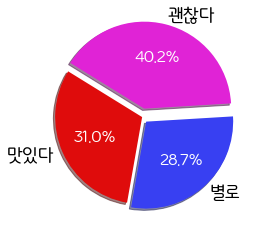

In [52]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Hancom MalangMalang'
plt.rc('font', size=18)
plt.rc('')

colors = ["#DF0C0C","#E023D6","#3840F2"]
aaa = [27,35,25]
ratio = (aaa[0],aaa[1],aaa[2])
labels = ['맛있다', '괜찮다', '별로']
explode = [0, 0.10, 0.07]

_, _, autotexts = plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True, explode=explode, colors=colors)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize('16')
plt.show()

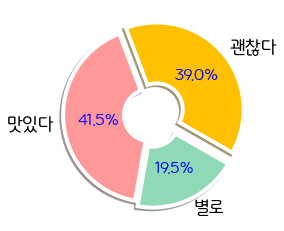

In [88]:
import matplotlib.pyplot as plt
path="C:/Users/Kosmo/Desktop/Test/"
plt.rcParams['font.family'] = 'Hancom MalangMalang'
plt.rc('font', size=18)


ratio = [34, 32, 16]
labels = ['맛있다', '괜찮다', '별로']
colors = ['#ff9999', '#ffc000', '#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 4}
explode = [0, 0.10, 0.07]

_,_, autotexts = plt.pie(ratio, labels=labels, autopct='%.1f%%',shadow=True, startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops, explode=explode)
for autotext in autotexts:
    autotext.set_color('blue')
    autotext.set_fontsize('16')

plt.savefig(path+"test.png",format='png',dpi=300, facecolor="white")
#plt.show()

In [56]:
# 폰트 찾기 
import matplotlib.font_manager as fom
font_list = [font.name for font in fom.fontManager.ttflist]
for f in font_list:
    print(f"{f}.ttf")

DejaVu Sans Mono.ttf
DejaVu Serif Display.ttf
cmex10.ttf
DejaVu Serif.ttf
STIXSizeThreeSym.ttf
cmss10.ttf
DejaVu Sans.ttf
STIXNonUnicode.ttf
STIXNonUnicode.ttf
cmsy10.ttf
DejaVu Sans.ttf
STIXGeneral.ttf
cmr10.ttf
DejaVu Serif.ttf
STIXSizeFiveSym.ttf
STIXNonUnicode.ttf
STIXSizeOneSym.ttf
DejaVu Sans Mono.ttf
STIXGeneral.ttf
DejaVu Sans Display.ttf
DejaVu Sans Mono.ttf
STIXSizeOneSym.ttf
DejaVu Serif.ttf
cmtt10.ttf
STIXSizeFourSym.ttf
STIXSizeTwoSym.ttf
STIXNonUnicode.ttf
DejaVu Sans Mono.ttf
DejaVu Sans.ttf
DejaVu Sans.ttf
STIXSizeFourSym.ttf
DejaVu Serif.ttf
STIXSizeTwoSym.ttf
STIXGeneral.ttf
cmb10.ttf
STIXGeneral.ttf
cmmi10.ttf
STIXSizeThreeSym.ttf
Microsoft YaHei.ttf
Bodoni MT.ttf
Trebuchet MS.ttf
Gill Sans Ultra Bold.ttf
SimSun-ExtB.ttf
Garamond.ttf
Sitka Small.ttf
Bodoni MT.ttf
Courier New.ttf
Monotype Corsiva.ttf
Viner Hand ITC.ttf
HYGungSo-Bold.ttf
Ami R.ttf
Franklin Gothic Demi.ttf
Vladimir Script.ttf
Rockwell Extra Bold.ttf
Tw Cen MT Condensed Extra Bold.ttf
Bell MT.ttf
Mongoli

In [28]:
# gauge chart
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 25,
    mode = "gauge+number", #+delta
    title = {'text': "Service"},
    #delta = {'reference': 60},
    gauge = {'axis': {'range': [None, 100]},
             'steps' : [
                 {'range': [0, 30], 'color': "lightgray"},
                 {'range': [70, 100], 'color': "gray"}]}))

fig.show()